# Caching
This is a big example notebook. It's a very good one. 

In [11]:
from cache import CyclicCache, LRUCache, RandomCache
import random
import matplotlib.pyplot as plt
import numpy as np

## Getting data
creating multiple test data with different address space and different cache sizes

In [12]:
# The following program creates 3 test datas with addresses randomly generated between 0 and 15, 0 and 40,and
# 0 and 100 stored in test_data_1, test_data_2, test_data_3 respectively. it then looks up each address in each
# test_data with RandomCache, LRUCache, and CyclicCache. These are all stored in test_data_1_lookups,
# test_data_2_lookups, test_data_3_lookups, which includes cache sizes of 4, 8, and 12.

def initialise_caches(size):
    global rand, lru, cache
    rand = RandomCache(size)
    lru = LRUCache(size)
    cache = CyclicCache(size)

def do_lookups(test_data):
    for address in test_data:
        rand.lookup(address)
        cache.lookup(address)
        lru.lookup(address)
        
def generate_hitcounts_data(size, test_data, test_data_lookups):
    initialise_caches(size)
    do_lookups(test_data)
    test_data_lookups += [rand.get_hit_count(),lru.get_hit_count(), cache.get_hit_count()]

test_data_1 = []
test_data_2 = []
test_data_3 = []
test_data_1_lookups = []
test_data_2_lookups = []
test_data_3_lookups = []
for i in range(1000):
    test_data_1.append(random.randint(0,15))
    test_data_2.append(random.randint(0,40))
    test_data_3.append(random.randint(0,100))

generate_hitcounts_data(4,test_data_1,test_data_1_lookups)
generate_hitcounts_data(8,test_data_1,test_data_1_lookups)
generate_hitcounts_data(12,test_data_1,test_data_1_lookups)
generate_hitcounts_data(4,test_data_2,test_data_2_lookups)
generate_hitcounts_data(8,test_data_2,test_data_2_lookups)
generate_hitcounts_data(12,test_data_2,test_data_2_lookups)
generate_hitcounts_data(4,test_data_3,test_data_3_lookups)
generate_hitcounts_data(8,test_data_3,test_data_3_lookups)
generate_hitcounts_data(12,test_data_3,test_data_3_lookups)

## plotting data
plotting the test data using matplotlib

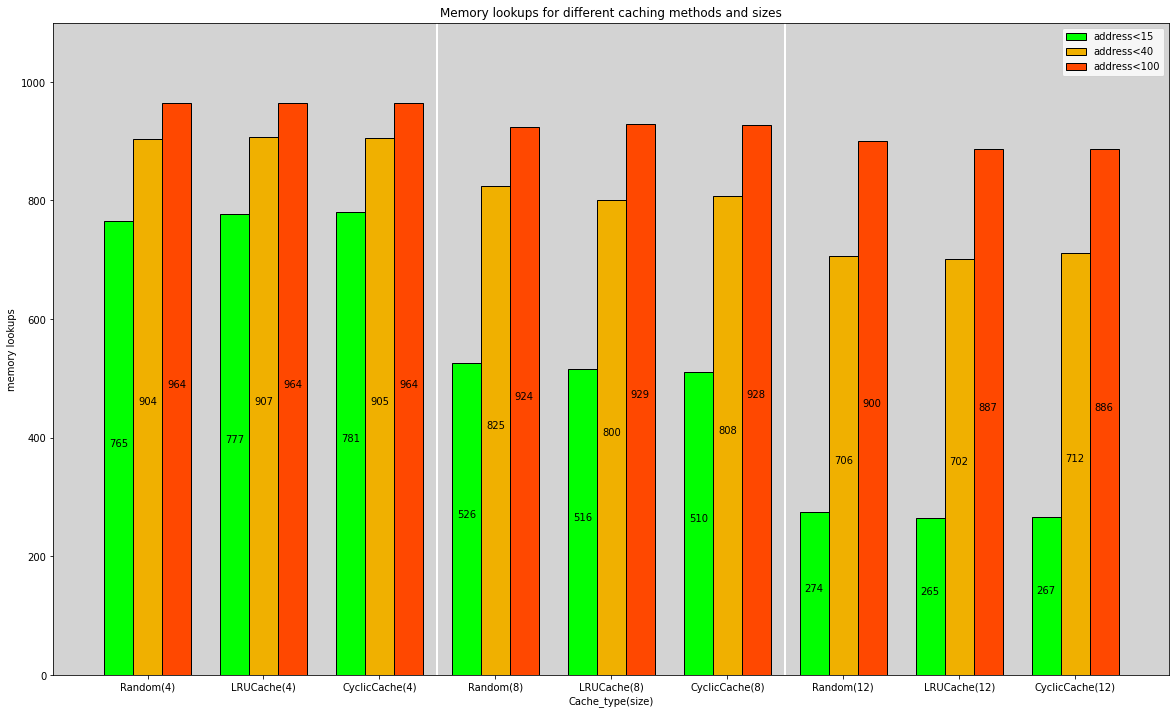

 
 
Note: Address < 15 is a category in which addresses are randomly generated between numbers 0 and 15.


In [13]:
labels = ['Random(4)', 'LRUCache(4)', 'CyclicCache(4)','Random(8)', 'LRUCache(8)',
          'CyclicCache(8)','Random(12)', 'LRUCache(12)', 'CyclicCache(12)']
x = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(x, test_data_1_lookups, width, color = '#00ff00', label='address<15', edgecolor="black")
x = x + width
rects2 = ax.bar(x, test_data_2_lookups, width, color = '#f0b000', label='address<40', edgecolor="black")
x = x + width
rects3 = ax.bar(x, test_data_3_lookups, width, color = '#ff4800', label='address<100', edgecolor="black")
x = x - width * 2
ax.set_xlabel('Cache_type(size)')
ax.set_ylabel('memory lookups')
ax.set_title('Memory lookups for different caching methods and sizes')
y = ax.set_xticks(x + width)
ax.set_xticklabels(labels)
fig.set_figheight(12)
fig.set_figwidth(20)
ax.set_ylim([0,1100])
for rect in rects1+rects2+rects3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height/2, '%d' % int(height), ha='center',
             va='bottom',fontsize = 10)
ax.legend()
ax.set_facecolor('lightgrey')
plt.axvline(x=2.75, ymin=0, ymax=1, color = 'white', linewidth=2)
plt.axvline(x=5.75, ymin=0, ymax=1, color = 'white', linewidth=2)
plt.show()
print(' ')
print(' ')
print("Note: Address < 15 is a category in which addresses are randomly generated between numbers 0 and 15.")

# Conclusion

#### The green bar:
The green bar uses addresses between 0 and 15. i.e it has 15 different addresses that are randomly generated and stored in test_data_1. It can be seen that as the size of the cache (for all cache strategies) increases the memory lookups decreases. Furthermore, the cache stratgies seem to have no impact on the memory lookups. 

#### The brown bar:
The brown bar has an address space of 40 (40 different addresses). Just like the green bar, as the size of the cache (independent of the cache strategy used) increases the memory lookups decrease. However, it does not decrease as much as the green bar. The reason behind this is because the test data includes addresses between 0 and 40 i.e it has 40 different addresses that are randomly generated. As expected, it would be much harder to find a stored value in the cache of a small size when you have a big address space. Furthermore, different cache stratgies seem to have no impact on the memory lookups just like the green bars as mentioned above.

#### the red bar:
The red bar has an address space of 100 (100 different addresses). with such a big address space relative to the cache size used (4,8 and 12), it would be difficult to find the same value stored in the cache. However, it can be seen that the memory lookups decrease as the cache size increases, however, in a very small amount. Furthermore, different cache stratgies seem to have no impact on the memory lookups just like the green bars.

#### Are there differences between the behaviour of the strategies?
- different cache stratgies have no impact on the memory lookups, they all result in very close amount of memory lookups (This can be seen by comparing the same colored bar in each cache type of size N. For example, the green bars that uses Random,LRU, and Cyclic strategies of size 4 all have very similar amount of memory lookups.)

#### How often does a lookup result in memory access?
- cache size is inversely proportional to the memory lookups (as the size of the cache for all cache strategies increases the memory lookups decreases and vice versa)
- as the ratio of address space over cache size increases, the memory look ups increases (this can be seen by comparing the green bar, the brown bar, and the red bar)
- a big ratio of an address space over cache size will result in a very small decrease in memory lookups (this can be seen by comparing the red bars), while a small ratio of an address space over cache  size will result in a big decrease of memory lookups (this can be seen by comparing the green bars)

#### EXCEPTION
Note that the experiment conducted above uses test data full of addresses that are generated <b>randomly</b>. The reason that the LRU method and the Cyclic method have almost the same memory look ups is because the data is full of random addresses. Realistically, it is not completely random. if it were not generated randomly it may result in memory lookups (using the LRU method) less than the cylic cache. Generating my own hand-crafted test data may be a little biased, therefore there is no point in doing that, but it is worth noting what is mentioned above (this section).
